In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
df = pd.read_csv("../../Files/iris.csv")


In [84]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [86]:
df["species"].value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

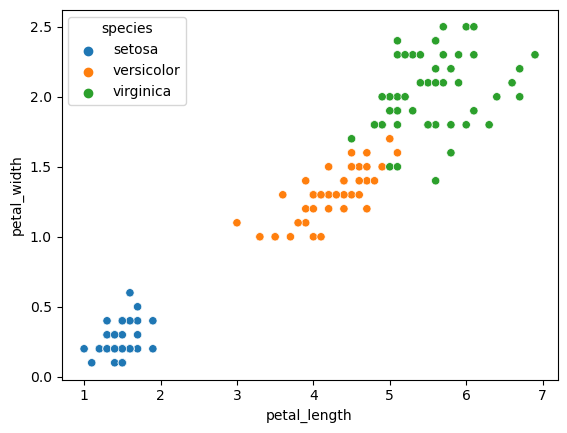

In [87]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.savefig("petal length vs width.png")
plt.show()


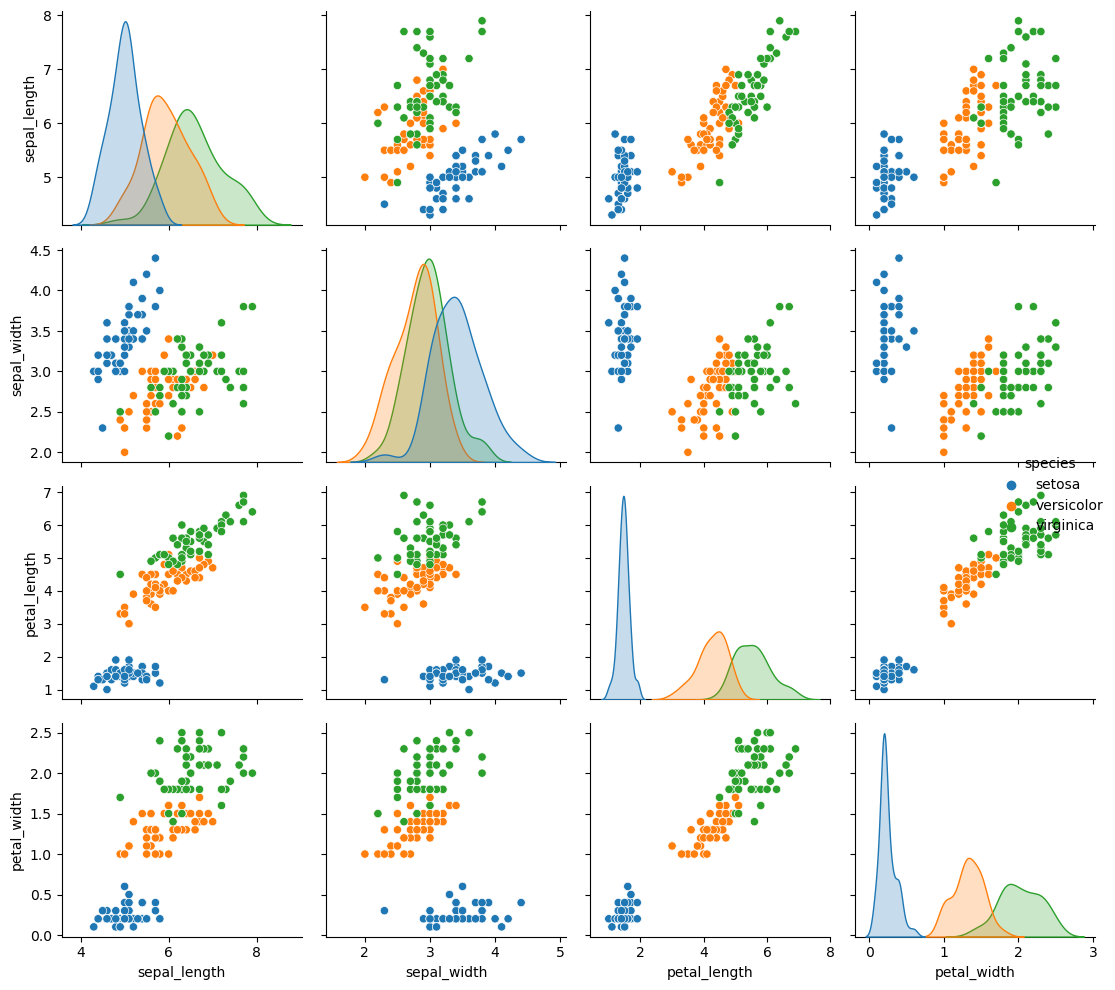

In [88]:
sns.pairplot(data=df, hue="species")
plt.tight_layout()
plt.savefig("pairplot.png")


C:\Users\habib\AppData\Local\Temp\ipykernel_972\4037840597.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


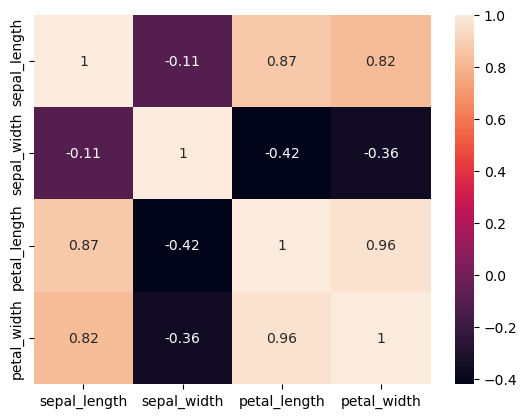

In [89]:
sns.heatmap(df.corr(), annot=True)
plt.savefig("correletion heatmap.png")


In [90]:
X = df.drop("species", axis=1)
y = df["species"]


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()




In [93]:
scaled_X_train = scaler.fit_transform(X_train)

In [94]:
scaled_X_test = scaler.transform(X_test)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
from sklearn.model_selection import GridSearchCV


In [97]:
log_model = LogisticRegression(solver="saga", multi_class="ovr", max_iter=5000)


In [98]:
penalty = ["l1", "l2","elasticnet"]

l1_ratio = np.linspace(0, 1, 20)

C = np.logspace(0, 10, 20)
param_grid = {
    "penalty": penalty,
    "l1_ratio": l1_ratio,
    "C": C
}


In [99]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)


In [100]:
grid_model.fit(X_train, y_train)


c:\Users\habib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\habib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\habib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\habib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\habib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\habib\anaconda3\lib\site-packag

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix


In [ ]:
grid_model.best_params_


{'C': 59.94842503189409, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [ ]:
y_prediction = grid_model.predict(scaled_X_test)


c:\Users\habib\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_prediction


array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor'], dtype=object)

In [ ]:
accuracy_score(y_test, y_prediction)


0.7368421052631579

In [ ]:
confusion_matrix(y_test, y_prediction)


array([[ 7,  3,  0],
       [ 0, 17,  0],
       [ 0,  7,  4]], dtype=int64)

c:\Users\habib\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\habib\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


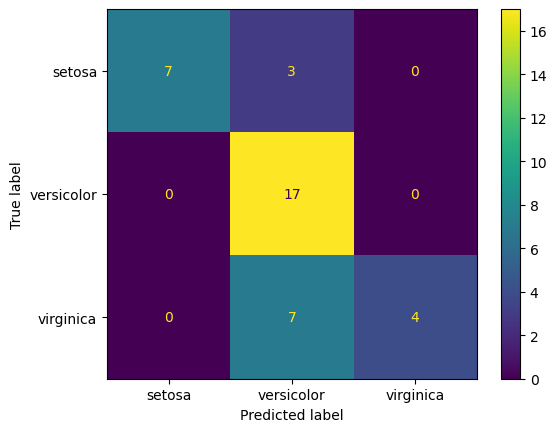

In [ ]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)
plt.savefig("confusion_matrix.png")

In [ ]:
print(classification_report(y_test, y_prediction))


              precision    recall  f1-score   support

      setosa       1.00      0.70      0.82        10
  versicolor       0.63      1.00      0.77        17
   virginica       1.00      0.36      0.53        11

    accuracy                           0.74        38
   macro avg       0.88      0.69      0.71        38
weighted avg       0.83      0.74      0.72        38



In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc


In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()